In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import seaborn as sns
import read_data
import pandas as pd

df = read_data.read_data('Chicago')

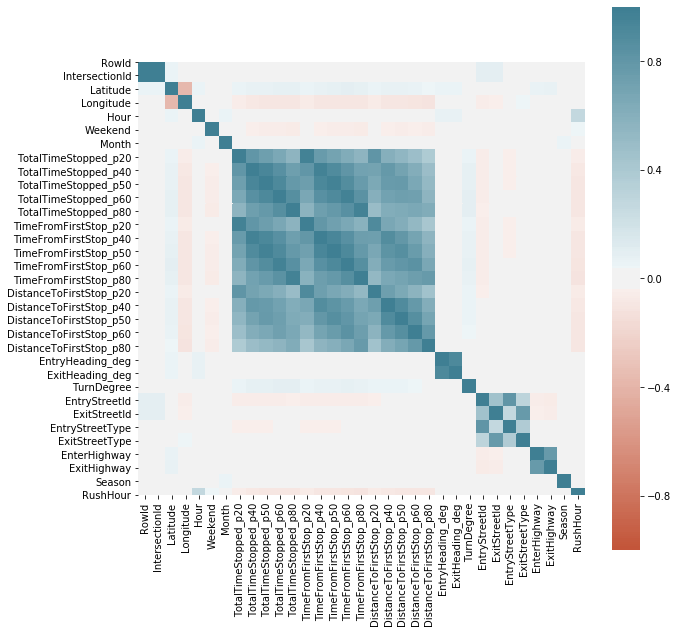

In [3]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(20, 220, n=200))
plt.show()

In [4]:
#that is kind of hard to see the values I care about
#lets re-order the dataframe so that it will be in order by type
cols = ['IntersectionId', 'Latitude', 'Longitude',
        'Season', 'Month', 'RushHour', 'Hour', 'Weekend',
        'EntryHeading_deg', 'ExitHeading_deg', 'TurnDegree',
        'EnterHighway', 'ExitHighway', 'EntryStreetId','ExitStreetId','ExitStreetType','EntryStreetType',
        'TimeFromFirstStop_p20','TimeFromFirstStop_p50','TimeFromFirstStop_p80',
        'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80',
        'TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80']
df2 = pd.DataFrame()
for col in cols:
    df2[col] = df[col]

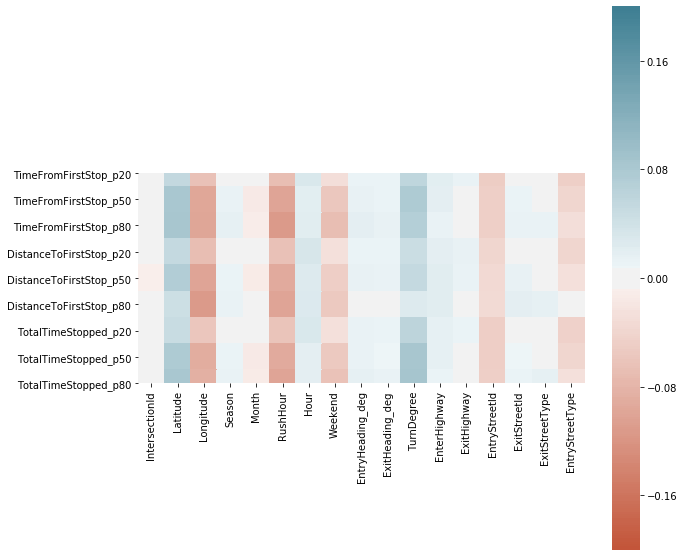

In [5]:
# Now lets do the correclation however lets drop predictors from the y-axis and predictions from the x-axis
x = df2.corr()
x.drop(['IntersectionId', 'Latitude', 'Longitude',
        'Season', 'Month', 'RushHour', 'Hour', 'Weekend',
        'EntryHeading_deg', 'ExitHeading_deg', 'TurnDegree',
        'EnterHighway', 'ExitHighway', 'EntryStreetId','ExitStreetId','ExitStreetType','EntryStreetType'],
       axis=0, inplace=True)
x.drop(['TimeFromFirstStop_p20','TimeFromFirstStop_p50','TimeFromFirstStop_p80',
        'DistanceToFirstStop_p20','DistanceToFirstStop_p50',  'DistanceToFirstStop_p80',
        'TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80'], axis=1, inplace=True)

sns.heatmap(x,vmin=-0.2, vmax=0.2, center=0,
            square=True, cmap = sns.diverging_palette(20, 220, n=200))
plt.show()

In [6]:
# That seems to congtradict my previous findings by showing IntenrsectionId does nothing 
# and RushHour is better than Hour and TurnDegree is fairly significant